In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%aimport easysnowdata
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

## Harmonized Landsat-Sentinel (HLS)

We will use `easysnowdata` to access the HLS data for a single reservoir in the following section.

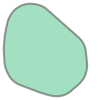

In [3]:
import geopandas as gpd
from pathlib import Path

# read the bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

dumboor_pt = val_pts.loc[val_pts['tmsos_id']=='0505']
dumboor_poly = val_polys.loc[val_polys['tmsos_id']=='0505']

buffered_roi = dumboor_poly.geometry.iloc[0].convex_hull.buffer(0.05)
bbox = buffered_roi.bounds
buffered_roi

In [4]:
dumboor_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
hls = easysnowdata.remote_sensing.HLS(
    bbox_input=buffered_roi, start_date="2022-07-01", end_date="2022-07-31"
)

Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 46N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data scaled to reflectance. Access with the .data attribute. To turn this behavior off, set scale_data=False.
Metadata retrieved. Access with the .metadata attribute. To turn this behavior off, set add_metadata=False.
Platform, geometry, cloud cover, browse URLs added to data as coordinates. Access with the .data attribute. To turn this behavior off, set add_platform=False.


In [27]:
hls.data

<xarray.Dataset> Size: 567MB
Dimensions:                    (y: 779, x: 650, time: 14)
Coordinates:
  * y                          (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
  * x                          (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
    spatial_ref                int32 4B 32646
  * time                       (time) datetime64[ns] 112B 2022-07-02T04:32:12...
    platform                   (time) <U11 616B 'Sentinel-2A' ... 'Sentinel-2B'
    eo:cloud_cover_avg         (time) int64 112B 60 84 90 76 36 ... 97 63 49 92
    AssociatedBrowseImageUrls  (time) object 112B ['https://data.lpdaac.earth...
    geometry                   (time) object 112B MULTIPOLYGON (((91.7501206 ...
Data variables: (12/20)
    coastal aerosol            (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    blue                       (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    green                      (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    red                        (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    nir narrow                 (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    swir 1                     (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    ...                         ...
    VAA                        (time, y, x) float32 28MB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    red-edge 1                 (time, y, x) float32 28MB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    red-edge 2                 (time, y, x) float32 28MB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    red-edge 3                 (time, y, x) float32 28MB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    nir broad                  (time, y, x) float32 28MB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    water vapor                (time, y, x) float32 28MB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>

In [28]:
hls.mask_data()

Data masked. Using Fmask, removed pixels classified as:
Cirrus
Cloud
Adjacent to cloud / shadow
Cloud shadows


In [29]:
hls.get_rgb()
hls.rgb

RGB data retrieved. Access with the .rgb attribute.


<xarray.DataArray (band: 3, time: 14, y: 779, x: 650)> Size: 85MB
dask.array<stack, shape=(3, 14, 779, 650), dtype=float32, chunksize=(1, 1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y                          (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
  * x                          (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
    spatial_ref                int32 4B 32646
  * time                       (time) datetime64[ns] 112B 2022-07-02T04:32:12...
    platform                   (time) <U11 616B 'Sentinel-2A' ... 'Sentinel-2B'
    eo:cloud_cover_avg         (time) int64 112B 60 84 90 76 36 ... 97 63 49 92
    AssociatedBrowseImageUrls  (time) object 112B ['https://data.lpdaac.earth...
    geometry                   (time) object 112B MULTIPOLYGON (((91.7501206 ...
  * band                       (band) object 24B 'red' 'green' 'blue'

/tmp/ipykernel_4073270/2768112220.py:3: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, time, platform in zip(f.axes.flat, hls.rgb.time.values, hls.rgb.platform.values):


Text(0.5, 1.04, 'Harmonized Landsat Sentinel-2 (HLS) time series')

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


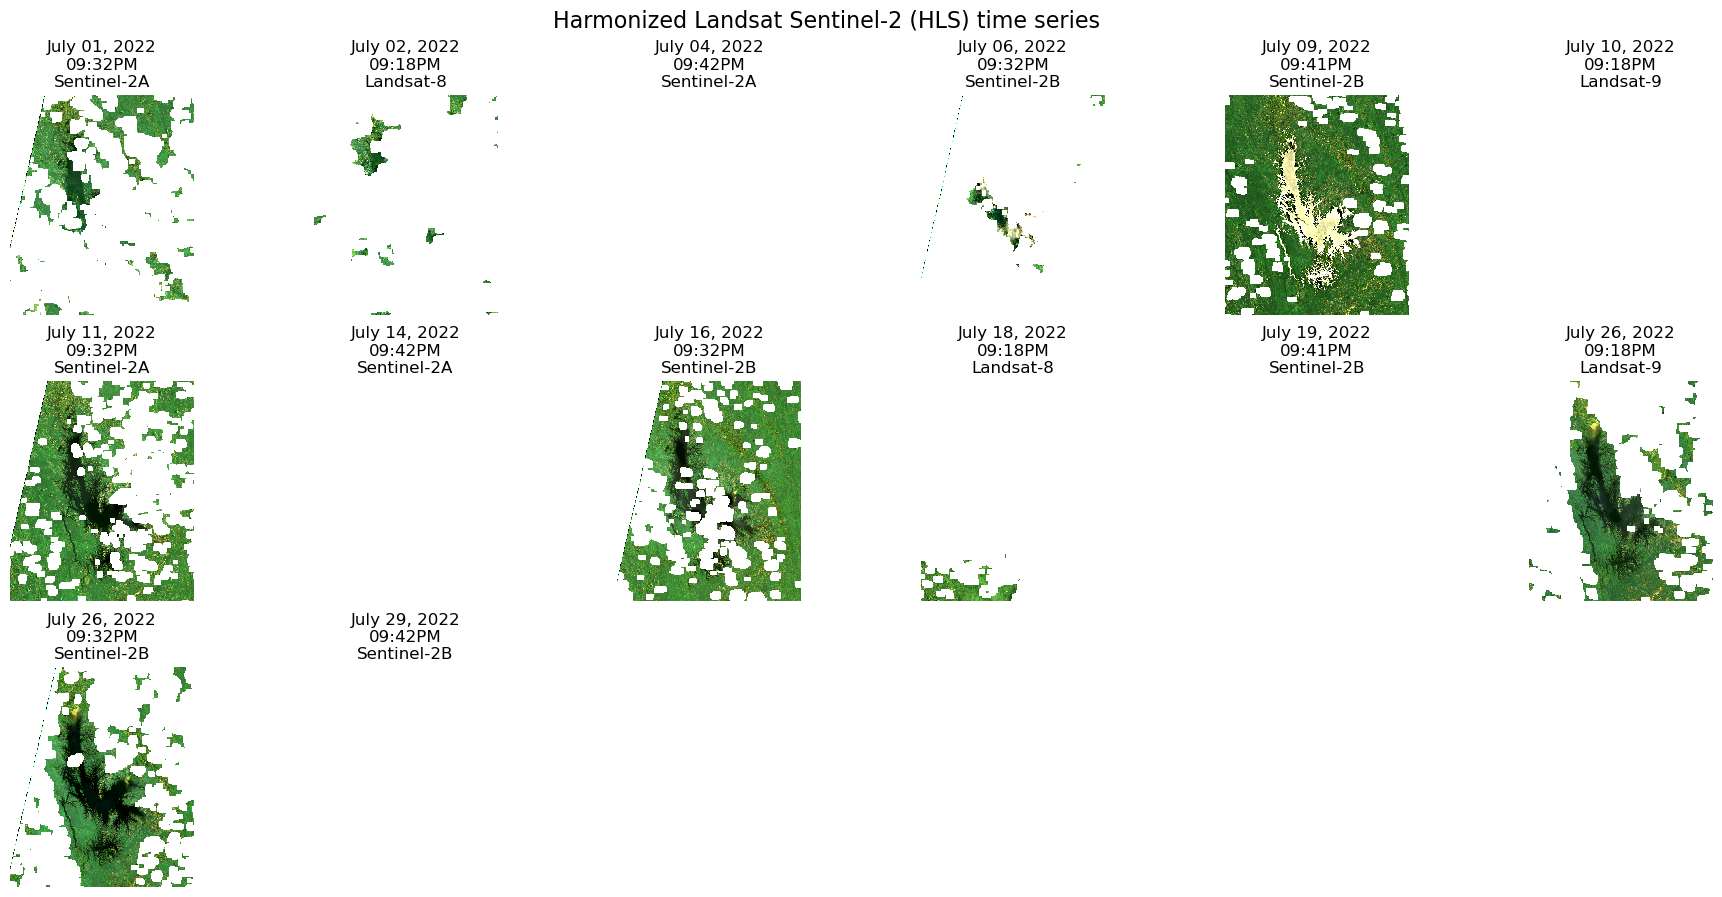

In [30]:
f = hls.rgb.plot.imshow(col='time',col_wrap=6,robust=True)

for ax, time, platform in zip(f.axes.flat, hls.rgb.time.values, hls.rgb.platform.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('America/Los_Angeles')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}\n{platform}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.subplots_adjust(hspace=0.3)
f.fig.suptitle('Harmonized Landsat Sentinel-2 (HLS) time series',fontsize=16,y=1.04)

In [31]:
hls.get_ndwi()
hls.ndwi

NDWI data calculated. Access with the .ndwi attribute.


<xarray.DataArray (time: 14, y: 779, x: 650)> Size: 28MB
dask.array<truediv, shape=(14, 779, 650), dtype=float32, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y                          (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
  * x                          (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
    spatial_ref                int32 4B 32646
  * time                       (time) datetime64[ns] 112B 2022-07-02T04:32:12...
    platform                   (time) <U11 616B 'Sentinel-2A' ... 'Sentinel-2B'
    eo:cloud_cover_avg         (time) int64 112B 60 84 90 76 36 ... 97 63 49 92
    AssociatedBrowseImageUrls  (time) object 112B ['https://data.lpdaac.earth...
    geometry                   (time) object 112B MULTIPOLYGON (((91.7501206 ...

/tmp/ipykernel_4073270/3517636788.py:5: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, time, platform in zip(f.axes.flat, hls.ndwi.time.values, hls.ndwi.platform.values):


Text(0.5, 1.04, 'Harmonized Landsat Sentinel-2 (HLS) time series')

<Figure size 1000x1000 with 0 Axes>

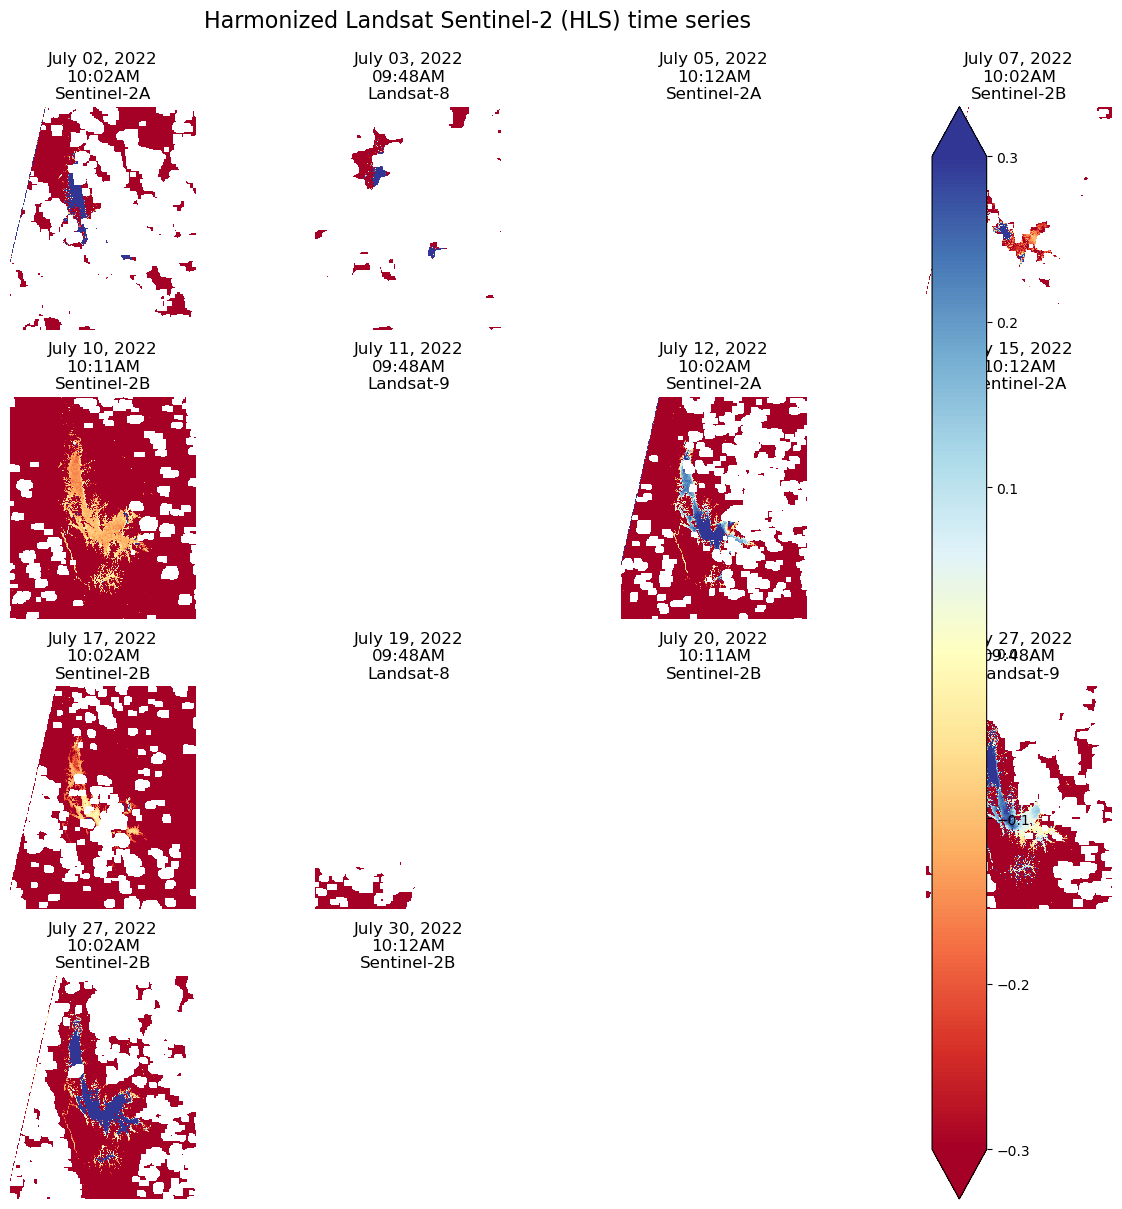

In [37]:
fig = plt.figure(figsize=(10, 10))

f = hls.ndwi.plot.imshow(col='time',col_wrap=4,robust=True, cmap='RdYlBu', vmax=0.3)

for ax, time, platform in zip(f.axes.flat, hls.ndwi.time.values, hls.ndwi.platform.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('Asia/Kolkata')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}\n{platform}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.subplots_adjust(hspace=0.3)
f.fig.suptitle('Harmonized Landsat Sentinel-2 (HLS) time series',fontsize=16,y=1.04)

## Download HLS data for 10 reservoirs

Now that we have a way of accessing HLS data, let's download the data locally so that we can use it in our further analysis.

In [3]:
from pathlib import Path

hls_save_dir = Path('../data/hls')
hls_save_dir.mkdir(exist_ok=True)

Select a few reservoirs, say 10 reservoirs and download their data.

The data will be saved as follows:
```
data/
..hls/
....<res 1 tmsos_id>/
......year 1/
......year 2/
....<res 2 tmsos_id>/
......year 1/
......year 2/
....<res 3 tmsos_id>/
......year 1/
......year 2/
:
```

<Axes: >

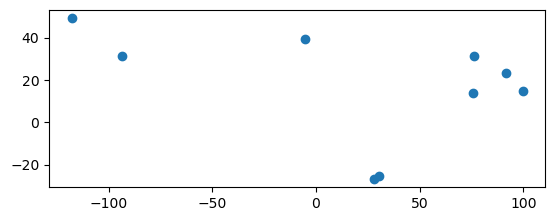

In [9]:
import geopandas as gpd
from pathlib import Path

# read the bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

selected_reservoirs = [
    '0505', # dumboor. India
    # '0810', # sirindhorn, Thailand.
    '0830', # Krasoew, Thailand.
    '0502', # Bhakra dam, India.
    '0518', # Bhadra, India.
    '0349', # vaaldam, South Africa.
    '0464', # Sterkspruit, South Africa.
    '0214', # Cijara, Spain
    '1498', # Toledo bend, US
    '0936', # Arrow, Canada
]

val_res_pt = val_pts.loc[val_pts['tmsos_id'].isin(selected_reservoirs)]
val_res_poly = val_polys.loc[val_polys['tmsos_id'].isin(selected_reservoirs)]

val_res_pt.plot()

In [10]:
import dask
from dask.distributed import Client

In [6]:
client = Client(
    n_workers=10, threads_per_worker=1
)
client

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42969 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:42969/status,
Dashboard: http://127.0.0.1:42969/status,Workers: 10
Total threads: 10,Total memory: 187.55 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36481,Workers: 10
Dashboard: http://127.0.0.1:42969/status,Total threads: 10
Started: Just now,Total memory: 187.55 GiB
Comm: tcp://127.0.0.1:40985,Total threads: 1
Dashboard: http://127.0.0.1:34773/status,Memory: 18.76 GiB
Nanny: tcp://127.0.0.1:46879,


2024-04-23 16:47:05,142 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:35655 (pid=4088064) exceeded 95% memory budget. Restarting...
2024-04-23 16:47:06,282 - distributed.nanny - WARNING - Restarting worker
2024-04-23 16:50:50,190 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:38969 (pid=4088072) exceeded 95% memory budget. Restarting...
2024-04-23 16:50:51,262 - distributed.nanny - WARNING - Restarting worker
2024-04-23 16:52:46,344 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:38173 (pid=4088091) exceeded 95% memory budget. Restarting...
2024-04-23 16:52:47,395 - distributed.nanny - WARNING - Restarting worker
2024-04-23 17:20:32,239 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:46273 (pid=4088255) exceeded 95% memory budget. Restarting...
2024-04-23 17:20:33,217 - distributed.nanny - WARNING - Restarting worker
2024-04-23 17:24:04,588 - distributed.nanny.memory - WARNING - Worker tcp://127.0.0.1:46793 (pid=4088279) exceed

In [11]:
import easysnowdata
import xarray as xr

def get_hls_id(
        id, 
        start_date="2022-07-01", 
        end_date="2022-07-31", 
        buffer=0.05
    ):
    roi = val_res_poly.loc[val_res_poly['tmsos_id']==id]
    buffered_roi = roi.geometry.iloc[0].convex_hull.buffer(buffer)
    hls = easysnowdata.remote_sensing.HLS(
        bbox_input=buffered_roi, start_date=start_date, end_date=end_date,
        bands=[
            'blue', 'green', 'red', 'nir narrow', 'swir 1', 'swir 2', 'Fmask'
        ]
    )
    hls.mask_data()

    raw_bands = hls.data
    hls.get_ndwi()
    ndwi = hls.ndwi.to_dataset(name='ndwi')

    data = xr.merge([raw_bands, ndwi])

    data = data.assign_coords(
        reservoir=((id))
    )

    data = data.chunk(chunks={
        'time': 30,
        'x': 4096,
        'y': 4096
    })
    
    # data['geometry'] = data['geometry'].astype(str)
    # data['AssociatedBrowseImageUrls'] = data['AssociatedBrowseImageUrls'].astype(str)

    return data

futures = []
dsses = []
for id in selected_reservoirs:
    future = client.submit(get_hls_id, id=id, start_date='2019-01-01', end_date='2024-03-30')
    futures.append(future)
futures

[<Future: pending, key: get_hls_id-989700533b7db7a51cb24e047b825c45>,
 <Future: pending, key: get_hls_id-443d471c8728af58a727d3f573e8d18d>,
 <Future: pending, key: get_hls_id-8f1b42a34a973fc328a15a69a348831b>,
 <Future: pending, key: get_hls_id-9db6623854c7ef8823b40a176981dd65>,
 <Future: pending, key: get_hls_id-382bec172212c2b883833d8d1b99e954>,
 <Future: pending, key: get_hls_id-c0df2a64bd8d05762b8af68527c13abf>,
 <Future: pending, key: get_hls_id-4a24f1a5f672abd135322168c55b77a7>,
 <Future: pending, key: get_hls_id-12eaee0eee1c8ebd2571d59644431228>,
 <Future: pending, key: get_hls_id-603e719637cb9bc0e4af049d7467b5b4>]

In [12]:
dsses = client.gather(futures)
dsses

Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
Data retrieved. Access with the .data attribute. Data CRS: WGS 84 / UTM zone 47N.
Nodata values removed from the data. In doing so, all bands converted to float32. To turn this behavior off, set remove_nodata=False.
Data scaled to reflectance. Access with the .data attribute. To turn this behavior off, set scale_data=Fa

2024-04-23 17:14:42,984 - distributed.worker - WARNING - Compute Failed
Key:       get_hls_id-4a24f1a5f672abd135322168c55b77a7
Function:  get_hls_id
args:      ()
kwargs:    {'id': '0214', 'start_date': '2019-01-01', 'end_date': '2024-03-30'}
Exception: 'ValueError("cannot reindex or align along dimension \'time\' because of conflicting dimension sizes: {1010, 1011} (note: an index is found along that dimension with size=1010)")'



ValueError: cannot reindex or align along dimension 'time' because of conflicting dimension sizes: {1010, 1011} (note: an index is found along that dimension with size=1010)

In [ ]:
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

total_size = 0
for ds in dsses:
    s = ds.nbytes
    total_size += s
    print(sizeof_fmt(s))
print(f'Total size: {sizeof_fmt(total_size)}')

For a month of HLS data for 10 reservoirs, the total size of dataset comes to around 17 GiB.

In [ ]:
dsses[0].drop_vars(['geometry', 'AssociatedBrowseImageUrls'])

<xarray.Dataset> Size: 389MB
Dimensions:             (time: 24, y: 779, x: 650)
Coordinates:
  * y                   (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
  * x                   (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
    spatial_ref         int32 4B 32646
  * time                (time) datetime64[ns] 192B 2020-01-02T04:42:03.396000...
    platform            (time) <U11 1kB dask.array<chunksize=(24,), meta=np.ndarray>
    eo:cloud_cover_avg  (time) int64 192B dask.array<chunksize=(24,), meta=np.ndarray>
    reservoir           <U4 16B '0505'
Data variables:
    blue                (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    green               (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    red                 (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    nir narrow          (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    swir 1              (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    swir 2              (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    Fmask               (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    ndwi                (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>

In [ ]:
for ds in dsses:
    reservoir_id = ds.reservoir.values
    savefp = hls_save_dir / f'{reservoir_id}.zarr'

    # temporarily remove geometry and AssociatedBrowseImageUrls
    ds = ds.drop_vars(['geometry', 'AssociatedBrowseImageUrls'])

    ds.to_zarr(savefp, mode='a', consolidated=True)

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 93.04 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 295.30 MiB.
This may cause some slowdown.
Consider scattering data ahead of time

Saved 12 GB data in 35 mins.